# Logistic Regression Model

In [56]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, roc_curve, roc_auc_score

In [65]:
df = pd.read_csv("atmospheric_weather_preprocessed.csv")
df.head(2)

,temperature,humidity,pressure,image
0,209.477417,3.186864,18499.99771,0
1,209.747436,3.067529,18499.99771,0


In [58]:
# Split the dataset into predictors (X) and the target variable (y)
X = df.drop("image", axis=1)
y = df["image"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Perform standard scaling on the training and testing data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the logistic regression model
logistic_model = LogisticRegression()

# Define the parameter grid for tuning
param_grid = {
    "C": [0.001, 0.01, 0.1, 1],
    "penalty": ["l1", "l2"],
}

In [55]:
# Perform grid search with cross-validation to find the best parameters
grid_search = GridSearchCV(logistic_model, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best logistic regression model with tuned parameters
best_model = grid_search.best_estimator_

# Print the best parameter values
print("Best Parameters:", grid_search.best_params_)

# Predict on the test data
predictions = best_model.predict(X_test_scaled)

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Calculate Cohen's kappa and p-value
n = np.sum(cm) 
po = accuracy  
pe = np.sum(np.sum(cm, axis=0) * np.sum(cm, axis=1)) / (n ** 2)  # Expected agreement by chance
kappa = (po - pe) / (1 - pe)
_, p_value = chi2_contingency(cm)[:2] 
print("Cohen's Kappa:", kappa)
print("p-value:", p_value)

Best Parameters: {'C': 0.1, 'penalty': 'l2'}
Confusion Matrix:
[[326 108]
 [279  90]]
Accuracy: 0.5180572851805728
Cohen's Kappa: -0.005123278898495006
p-value: 0.9363221009979805


C:\Users\abebe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\abebe\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\abebe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\abebe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 54, in _check_solver
    raise ValueError(
Value

AUC: 0.5042149039001911


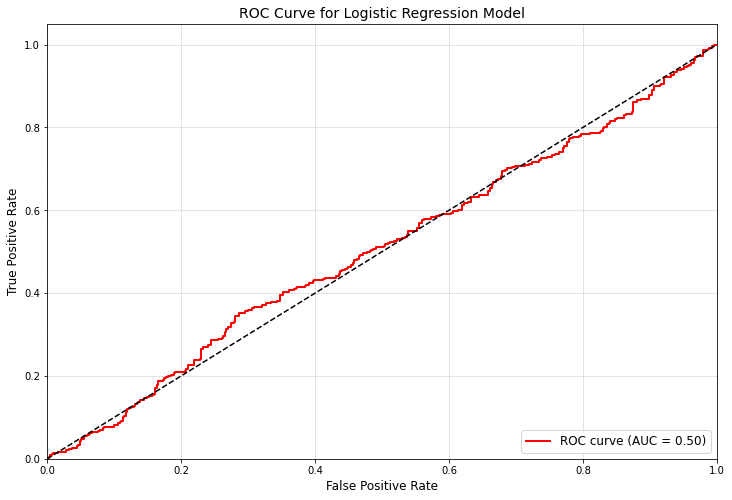

In [66]:
# Calculate AUC
auc = roc_auc_score(y_test, probs_positive)
print("AUC:", auc)
fpr, tpr, thresholds = roc_curve(y_test, probs_positive)
plt.figure(figsize=(12, 8))

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc), linewidth=2, color='red')

# Add a dashed line representing random guessing
plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5)

# Set plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve for Logistic Regression Model', fontsize=14)

# Customize grid
plt.grid(True, linestyle='--', linewidth=0.5)

# Customize legend
plt.legend(loc='lower right', fontsize=12)

# Show the plot
plt.show()



